In [ ]:
from google.colab import drive
drive.mount('/content/drive')


from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_file_path = '/content/drive/MyDrive/output/splitted/test'
train_file_path =  '/content/drive/MyDrive/output/splitted/train'
val_file_path =  '/content/drive/MyDrive/output/splitted/val'

valid_split = 0.2
input_size = (244, 244)
image_color = 'rgb'
batch_size = 32
shuffle=True
train_gen=ImageDataGenerator(rescale=1/255.0,validation_split=valid_split,fill_mode='nearest',rotation_range=40,horizontal_flip=True)

validation_gen=ImageDataGenerator(rescale=1/255.0,validation_split=valid_split)

test_gen=ImageDataGenerator(rescale=1/255.0)

train_data=train_gen.flow_from_directory(directory=train_file_path,target_size=input_size,color_mode=image_color,
                                             batch_size=batch_size,shuffle=shuffle,class_mode='categorical')
test_data=test_gen.flow_from_directory(directory=test_file_path,target_size=input_size,color_mode=image_color,
                                             batch_size=batch_size,shuffle=shuffle,class_mode='categorical')
valid_data=validation_gen.flow_from_directory(directory=val_file_path,target_size=input_size,color_mode=image_color,
                                             batch_size=batch_size,shuffle=shuffle,class_mode='categorical')


Mounted at /content/drive
Found 2711 images belonging to 4 classes.
Found 981 images belonging to 4 classes.
Found 984 images belonging to 4 classes.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, AveragePooling2D,Flatten,Input, GlobalAveragePooling2D, Concatenate
from keras.models import Model
from keras.optimizers import Adam
from keras.applications import EfficientNetB0,DenseNet121
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
# Define input shape
input_shape = (224, 224, 3)

# Define input layer
input_layer = Input(shape=input_shape)

# Define EfficientNet model
efficientnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# Define DenseNet model
densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze layers in both models
for layer in efficientnet.layers:
    layer.trainable = False
for layer in densenet.layers:
    layer.trainable = False

# Pass input through EfficientNet and DenseNet models
efficientnet_output = efficientnet(input_layer)
densenet_output = densenet(input_layer)

# Concatenate outputs from both models
concatenated_output = Concatenate()([efficientnet_output, densenet_output])

# Add global average pooling layer
pooled_output = GlobalAveragePooling2D()(concatenated_output)

# Add dense layer for classification
dense_output = Dense(1024, activation='relu')(pooled_output)
dense_o=Dense(512, activation='relu')(dense_output)
do=Dense(256, activation='relu')(dense_o)

# Add output layer for classification
output_layer = Dense(4, activation='softmax')(dense_output)

# Define model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_data, epochs=20, validation_data=valid_data)

Epoch 1/20
85/85 [==============================] - 81s 791ms/step - loss: 0.4416 - accuracy: 0.8336 - val_loss: 0.3563 - val_accuracy: 0.8587
Epoch 2/20
85/85 [==============================] - 64s 748ms/step - loss: 0.2270 - accuracy: 0.9093 - val_loss: 0.2549 - val_accuracy: 0.9055
Epoch 3/20
85/85 [==============================] - 67s 794ms/step - loss: 0.2103 - accuracy: 0.9188 - val_loss: 0.1893 - val_accuracy: 0.9360
Epoch 4/20
85/85 [==============================] - 67s 787ms/step - loss: 0.2106 - accuracy: 0.9159 - val_loss: 0.2418 - val_accuracy: 0.9035
Epoch 5/20
85/85 [==============================] - 63s 741ms/step - loss: 0.2046 - accuracy: 0.9144 - val_loss: 0.1922 - val_accuracy: 0.9309
Epoch 6/20
85/85 [==============================] - 66s 773ms/step - loss: 0.1810 - accuracy: 0.9307 - val_loss: 0.1799 - val_accuracy: 0.9329
Epoch 7/20
85/85 [==============================] - 65s 761ms/step - loss: 0.1679 - accuracy: 0.9340 - val_loss: 0.2223 - val_accuracy: 0.9106

In [ ]:
op = model.predict(test_data)
op1 = np.argmax(op,axis=1)
len(op1),len(test_data.classes)

31/31 [==============================] - 443s 15s/step


(981, 981)

In [ ]:
# Get the accuracy
accuracy = history.history['accuracy'][-1]
print('Validation accuracy:', accuracy)

Validation accuracy: 0.9553670287132263


In [ ]:
test_acc = model.evaluate(test_data)
print('Test accuracy:', test_acc)

31/31 [==============================] - 7s 229ms/step - loss: 0.1620 - accuracy: 0.9317
Test accuracy: [0.16200242936611176, 0.9317023158073425]


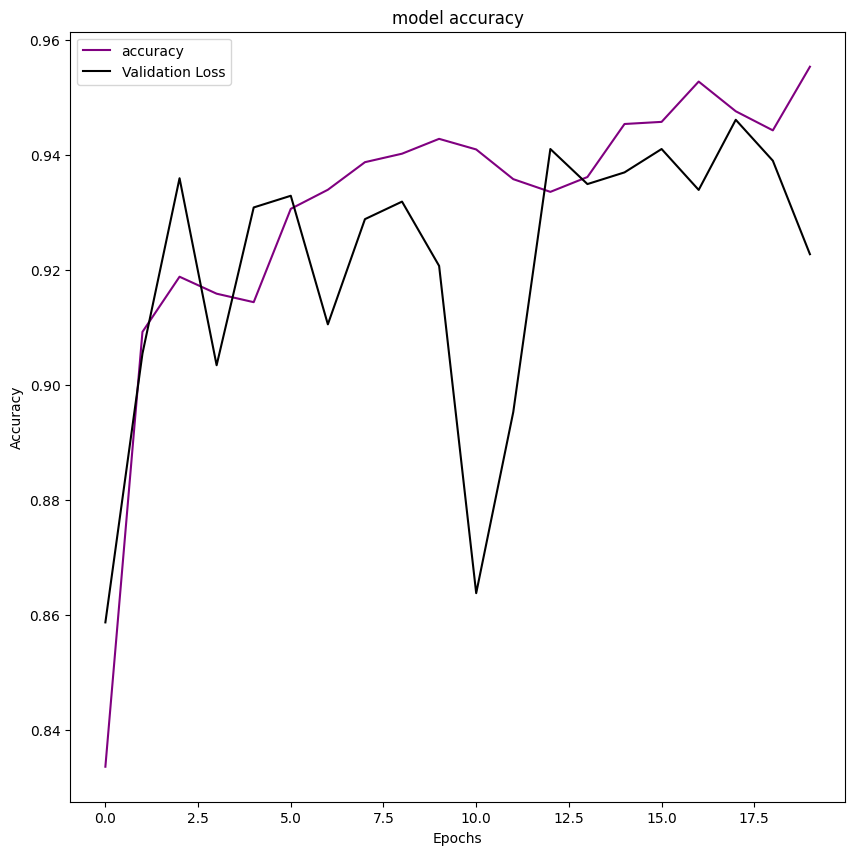

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'],color='purple')
plt.plot(history.history['val_accuracy'],color='black')
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["accuracy","Validation Loss"])
plt.show()

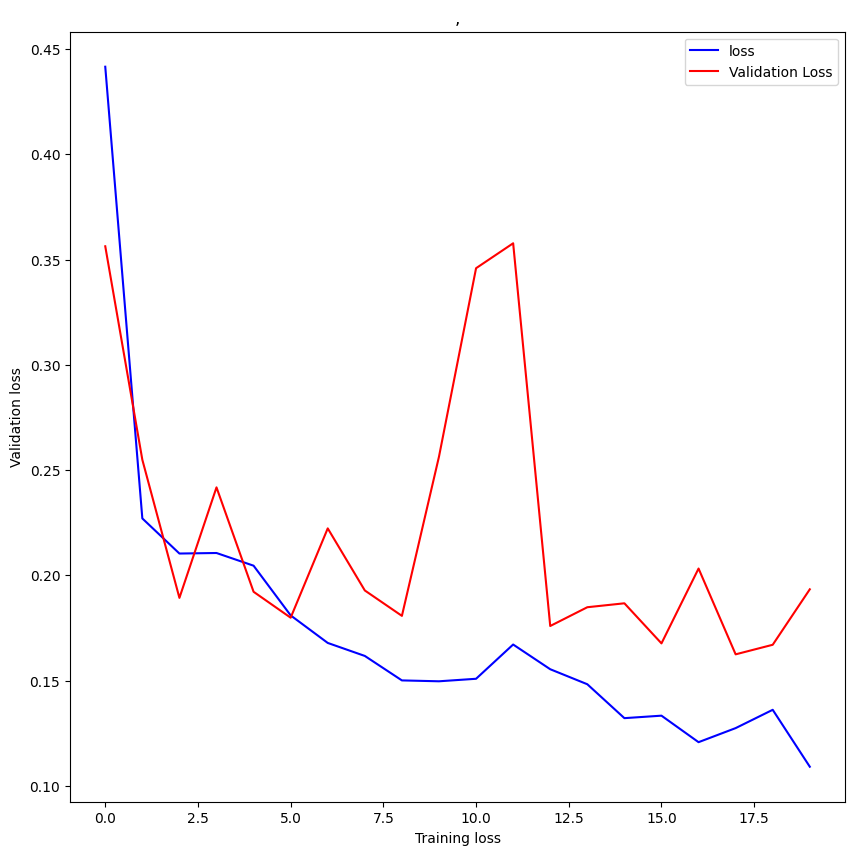

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='red')
plt.title(",")
plt.xlabel("Training loss")
plt.ylabel("Validation loss")
plt.legend(["loss","Validation Loss"])
plt.show()

In [ ]:
# Get the accuracy
accuracy = history.history['val_accuracy'][-1]
print('Validation accuracy:', accuracy)

Validation accuracy: 0.922764241695404
